In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix


In [4]:
import pandas as pd
import numpy as np


In [6]:
#
# Load the  dataset
#
drug_df = pd.read_csv('/content/Classification2_drug200.csv')
drug_df.head()


,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [7]:
drug_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


<Axes: title={'center': 'AGE DISTRIBUTION'}, ylabel='Density'>

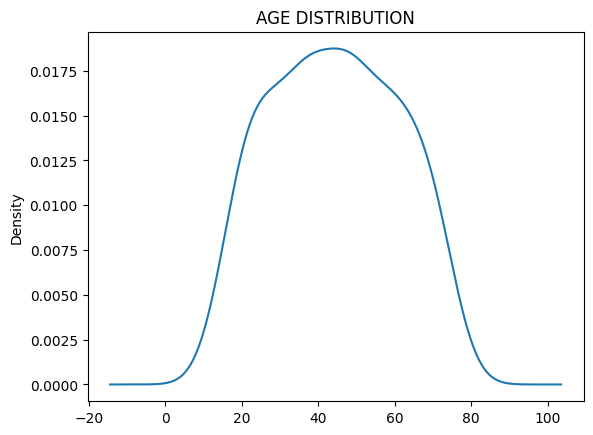

In [8]:

plt.title("AGE DISTRIBUTION")
drug_df['Age'].plot(kind='kde')


In [10]:
print(f"Mean age is {drug_df['Age'].mean()}")

Mean age is 44.315


<Axes: title={'center': 'Gender Distribution'}, xlabel='Sex', ylabel='count'>

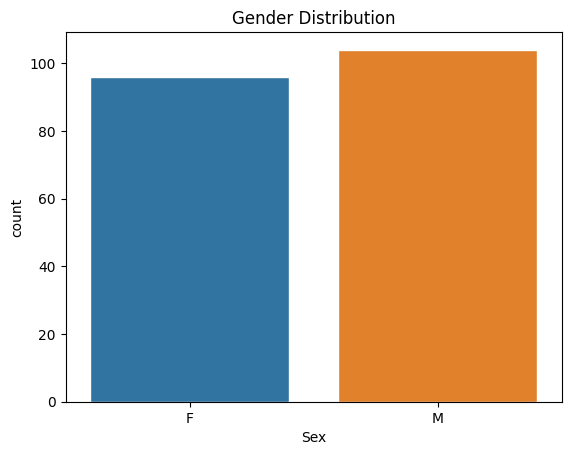

In [11]:
plt.title("Gender Distribution")
sns.set_style("darkgrid")
sns.countplot(x=drug_df.Sex)

In [13]:
drug_df['Drug'].value_counts()


DrugY    91
drugX    54
drugA    23
drugC    16
drugB    16
Name: Drug, dtype: int64

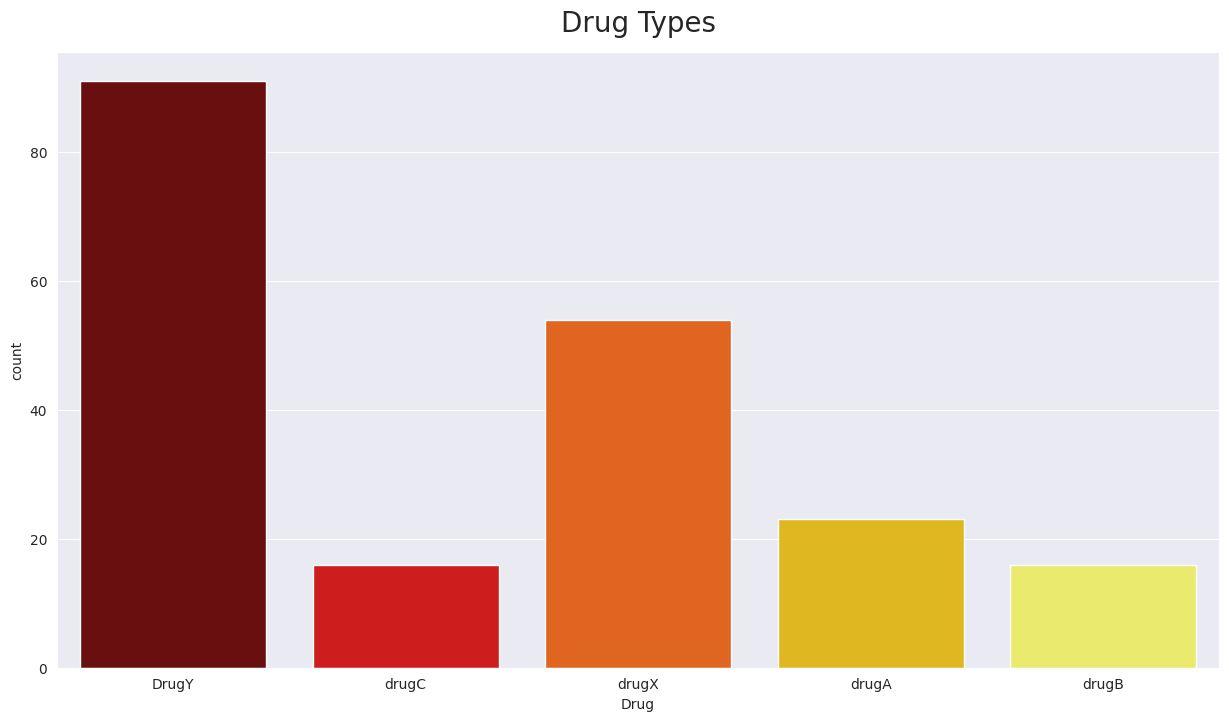

In [14]:
plt.figure(figsize=(15,8))
plt.title("Drug Types", fontsize=20, y=1.02)
sns.countplot(x = drug_df.Drug, palette="hot")
plt.show()

<Axes: xlabel='Drug', ylabel='Age'>

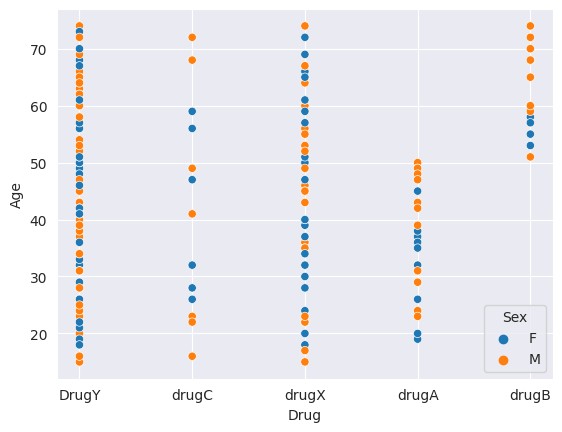

In [15]:
 sns.scatterplot(x='Drug',y='Age',hue='Sex',data=drug_df)


<Axes: title={'center': 'Blood Pressure'}, xlabel='BP', ylabel='count'>

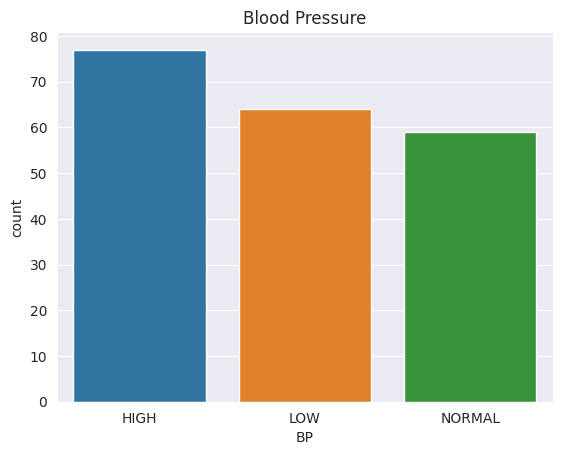

In [16]:
plt.title("Blood Pressure")
sns.countplot(x=drug_df.BP)


<Axes: xlabel='Drug', ylabel='Age'>

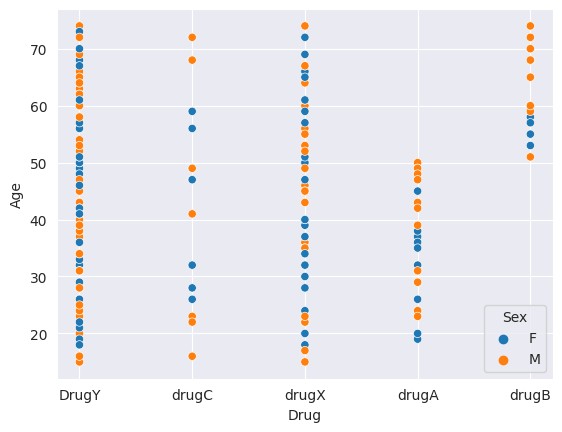

In [17]:
sns.scatterplot(x='Drug',y='Age',hue='Sex',data=drug_df)

<Axes: title={'center': 'Blood Pressure'}, xlabel='BP', ylabel='count'>

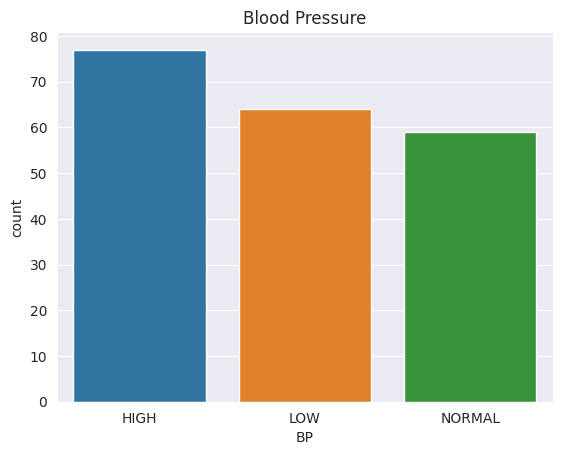

In [18]:

plt.title("Blood Pressure")
sns.countplot(x=drug_df.BP)

<Axes: xlabel='Drug', ylabel='count'>

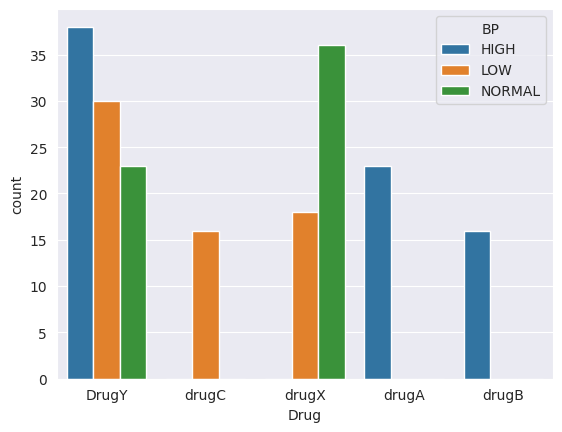

In [19]:
 sns.countplot(x='Drug',hue='BP',data = drug_df)


In [21]:
drug_df['Sex'] = drug_df['Sex'].map({'M': 1, 'F': 2})
drug_df['BP'] = drug_df['BP'].map({'HIGH': 1, "NORMAL" : 2, "LOW" : 3})
drug_df['Cholesterol'] = drug_df['Cholesterol'].map({'HIGH': 1, "NORMAL":2,"LOW":3})
drug_df["Drug"] = drug_df["Drug"].map({"DrugY":1, "drugC":2, "drugX":3, "drugA" :4,"drugB":5})

In [22]:

drug_df.head()


,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,2,1,1,25.355,1
1,47,1,3,1,13.093,2
2,47,1,3,1,10.114,2
3,28,2,2,1,7.798,3
4,61,2,3,1,18.043,1


In [23]:

X = drug_df.drop('Drug',axis=1)
y = drug_df['Drug']


In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=101)


In [25]:
len(X_train),len(X_test)


(160, 40)

In [28]:

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


Naive Bayes Prediction

In [29]:
from sklearn.naive_bayes import GaussianNB
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
# Train the Naive Bayes classifier on the training set.
clf = GaussianNB()
clf.fit(X_train, y_train)
# Predict the labels for the test set.
y_pred = clf.predict(X_test)
# Evaluate the accuracy of the classifier.
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.9
